# Table of Contents
[Plot Module](#plot-module)
1. [Plot Images in a Row](#plot-images-in-a-row)
2. [Displaying Multiple Images in a Grid Layout](#displaying-multiple-images-in-a-grid-layout)
3. [Plot Bounding Boxes with Labels and Confidence](#plot-bounding-boxes-with-labels-and-confidence)
4. [Plot Segmentation Masks](#plot-segmentation-masks)

# Plot Module


### Plot Images in a Row

`plot.image` function displays multiple images side by side for easy comparison.

**Function Overview**
- Accepts multiple images as keyword arguments.
- Automatically formats image titles.
- Converts BGR images to RGB for correct visualization.
- Supports both RGB and grayscale images.

**Arguments**
- `**image_dict` (dict):  
  - Keys: Image titles (str).  
  - Values: NumPy arrays representing images.  

**Returns**
- Displays images in a single row.


In [1]:
from core_assist import image_ops ,  plot

In [2]:
image_1_path = "../assets/image_ops_sample1.jpg"
image_2_path = "../assets/image_ops_sample2.jpg"
image_1 = image_ops.load_rgb(image_1_path)
image_2 = image_ops.load_rgb(image_2_path)
image_1 = image_ops.resize(image_1,(320,320))
image_2 = image_ops.resize(image_2,(320,320))

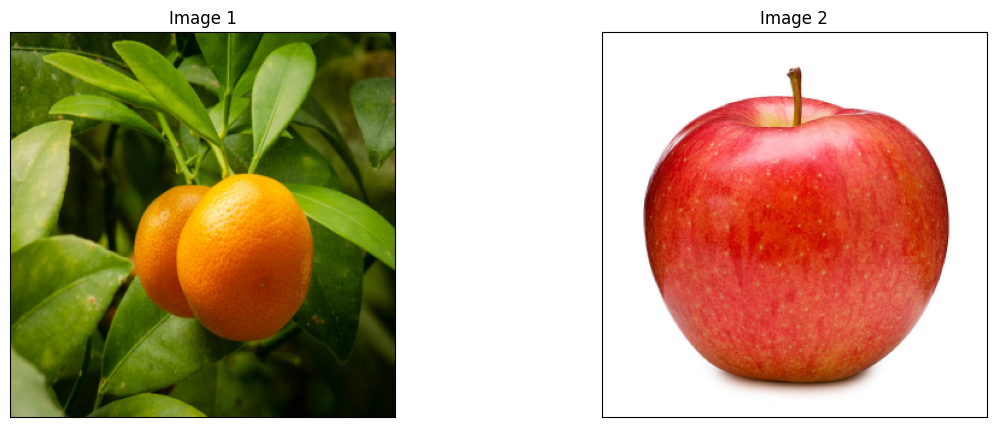

In [3]:
plot.image(image_1 = image_1 , image_2= image_2)

### Displaying Multiple Images in a Grid Layout

The **`plot.display_multiple_images`** function displays multiple images in a grid layout with the specified number of rows and columns.

#### Parameters:
- **`images`** (`list`): A list of image file paths or NumPy arrays representing the images.  
- **`labels`** (`list of str`, optional): A list of labels corresponding to the images. If provided, each label will be displayed as the title of the respective image. Defaults to `None`.  
- **`rows`** (`int`): The number of rows in the grid.  
- **`cols`** (`int`): The number of columns in the grid.
- **`rgb_flag`** (`bool`): Set to True when passing a list of NumPy arrays representing BGR images. If True, ensures BGR images are converted to and displayed as RGB images. Defaults to False.

#### Raises:
- **`ValueError`**: If the number of images does not match the number of labels (when `labels` is provided) or if the grid size is too small to display all the images.  
- **`TypeError`**: If an element in the `images` list is neither a file path (`str`) nor a NumPy array (`np.ndarray`).  


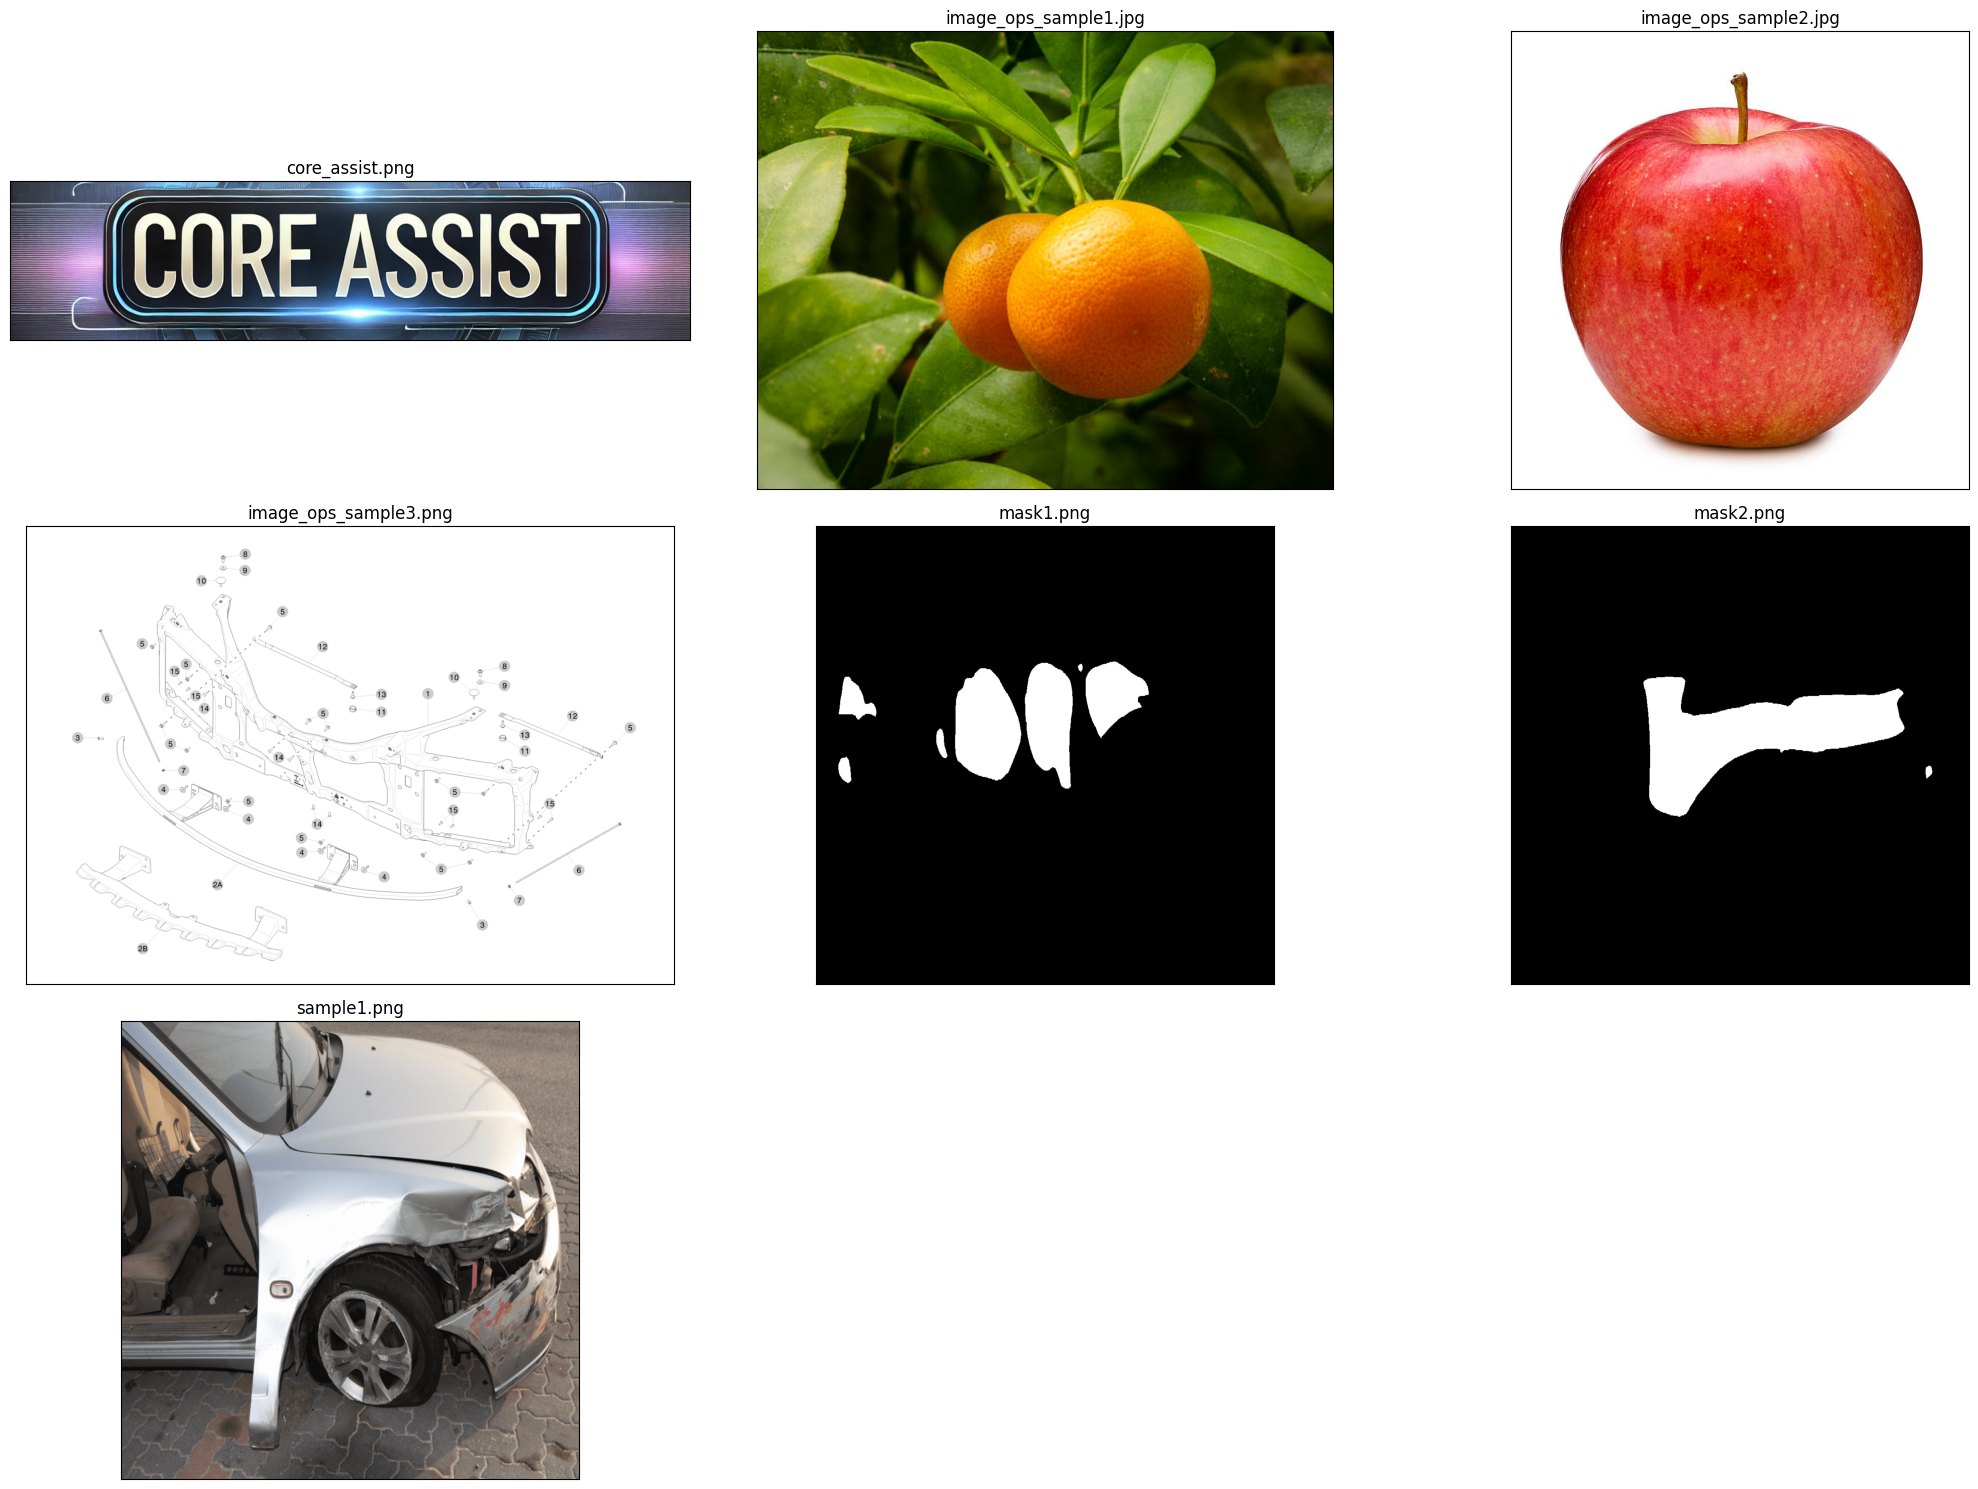

In [4]:
import os
base_path ="../assets"
plot.display_multiple_images(images=[os.path.join(base_path,i) for i in os.listdir(base_path)],labels=os.listdir(base_path),
                              rows=3,
                              cols=3 )


In [5]:
mask1_path = "../assets/mask1.png"
image1_path = "../assets/sample1.png"
mask2_path= "../assets/mask1.png"
image1 = image_ops.load_rgb(image1_path)
mask1 = image_ops.load_gray(mask1_path)
mask2= image_ops.load_gray(mask2_path)

### Plot Bounding Boxes with Labels and Confidence

The **plot.`bbox`** function draws multiple bounding boxes on an image, along with optional labels and confidence values. It ensures consistent colors for the same labels and provides padding for bounding boxes if needed.

#### Parameters:
- **`img`** (`np.ndarray`): The input image.
- **`bboxes`** (`list of tuples`): A list of bounding boxes specified as `(x, y, width, height)`.  
- **`labels`** (`list of str`, optional): A list of labels for each bounding box. Defaults to `None`.  
- **`confs`** (`list of float`, optional): A list of confidence values corresponding to each bounding box. Defaults to `None`.  
- **`pad`** (`float`): Padding percentage to expand the bounding boxes (e.g., `0.1` for 10% padding). Defaults to `0` (no padding).  
- **`text_color`** (`tuple`): The color of the text in BGR format. Defaults to white (`(255, 255, 255)`).  
- **`thickness`** (`int`): The thickness of the bounding box lines. Defaults to `2`.  
- **`font_scale`** (`float`): The scale of the text. Defaults to `0.5`.  
- **`ret`** (`bool`) : Default False if True the function will return the bbox_image(numpy array) it will not plot the images

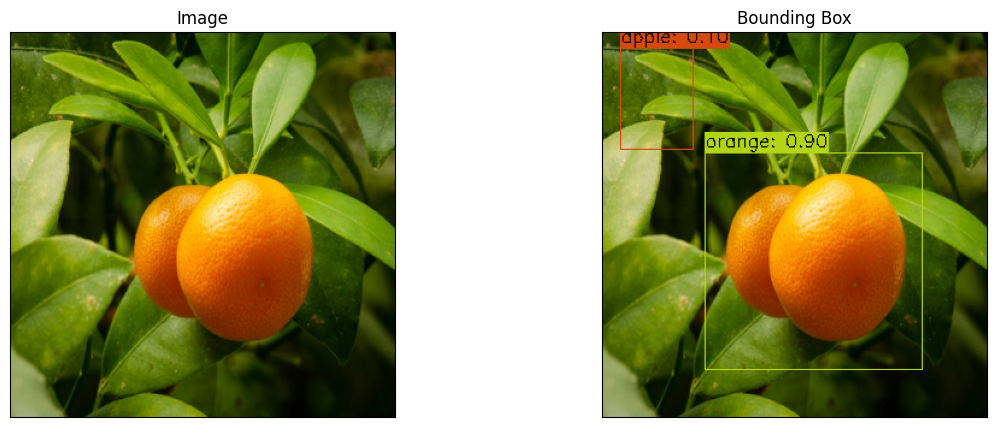

In [6]:
plot.bbox(img=image_1,
          bboxes=[(20,20,50,70),(100,115,150,150)],
          labels=["apple","orange"],
          confs=[0.1 , 0.9],
          thickness=1,
          font_scale=0.5,
          pad =0.1,
          text_color=(0,0,0),
          ret = False)

### Plot Segmentation Masks 

The **`plot.segment`** function performs segmentation on an image using multiple binary masks, combines them into a single mask with corresponding labels, and optionally draws bounding boxes (if provided).

#### Parameters:
- **`img`** (`str or np.ndarray`): Path to the input image or a numpy array (color image).  
- **`masks`** (`list of str or np.ndarray`): List of paths to mask images or a list of numpy arrays (grayscale masks).  
- **`mask_labels`** (`list of str`): List of labels corresponding to each mask.  
- 
 
- **`confs`** (`list of float`, optional): List of confidence scores for each bounding box. Defaults to `None`.
- **`bbox_flag`** (`bool`): If True, calculate bounding boxes from masks and overlay them.  
- **`pad_bbox`** (`float`): Padding percentage for bounding boxes (e.g., `0.1` for 10% padding). Defaults to `0`.  
- **`text_color`** (`tuple`): Color of the text in BGR format. Defaults to white (`(255, 255, 255)`).  
- **`thickness`** (`int`): Thickness of bounding box lines and text. Defaults to `2`.  
- **`font_scale`** (`float`): Scale of the label text. Defaults to `1`.
- **`segment_type`** (`str`): Type of segmentation ("outline", "filled", "both"). Defaults to "both".
ret (bool): Whether to return the processed images.

    Returns:
        If `ret` is True, returns (segmented image with bbox, combined mask).
    """


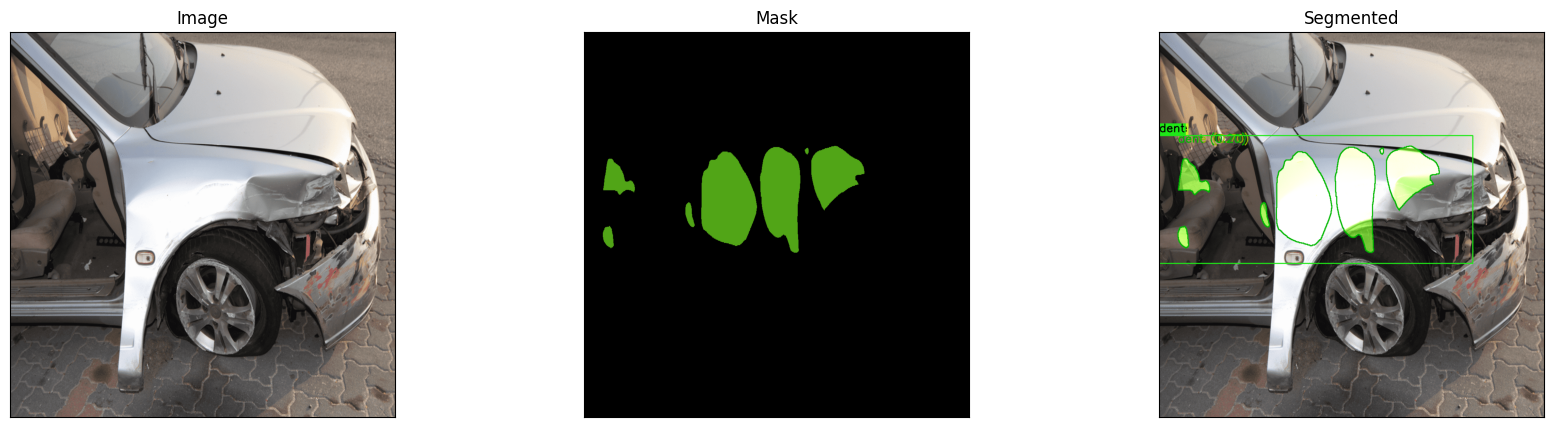

In [7]:
plot.segment(img=image1_path,
             masks=[mask1_path , mask2_path],
             mask_labels=["dent","none"],
             bbox_flag= True,
             confs=[0.2,0.7],
             font_scale=1,
             pad_bbox=0.1,
             text_color=(0,0,0),
             thickness=2,
             segment_type="both",
             ret= False

             )